In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline

# Testing

In [2]:
b08 = pd.read_csv('../data/b08c2.csv')
b08_viento = b08["viento"]

train_per = 0.6
data_len = b08_viento.shape[0]
data = b08_viento[:int(data_len*train_per)].as_matrix()
test = b08_viento[int(data_len*train_per):int(data_len*train_per)+100].as_matrix()

In [3]:
from statsmodels.tsa.arima_model import ARIMA

In [4]:
model = ARIMA(data,(3,0,3))
result = model.fit()
pred = result.forecast(steps=12)
t = test[:12]

/home/tronco/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [5]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 6998
Model:                     ARMA(3, 3)   Log Likelihood              -14050.251
Method:                       css-mle   S.D. of innovations              1.801
Date:                Thu, 11 May 2017   AIC                          28116.502
Time:                        12:25:49   BIC                          28171.329
Sample:                             0   HQIC                         28135.395
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.4429      0.088     72.946      0.000         6.270     6.616
ar.L1.y        2.1486      0.003    677.010      0.000         2.142     2.155
ar.L2.y       -2.0385      0.004   -457.282      0.000        -2.047    -2.030
ar.L3.y        0.7346      0.003    234.123      0.000         0.728     0.741
ma.L1.y       -1.3182      0.012   -107.439      0.000        -1.342    -1.294
ma.L2.y        0.8657      0.017     49.866      0.000         0.832     0.900
ma.L3.y        0.0901      0.012      7.349      0.000         0.066     0.114
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7071           -0.7073j            1.0002           -0.1250
AR.2            0.7071           +0.7073j            1.0002            0.1250
AR.3            1.3609           -0.0000j            1.3609           -0.0000
MA.1            0.7091           -0.7098j            1.0033           -0.1251
MA.2            0.7091           +0.7098j            1.0033            0.1251
MA.3          -11.0294           -0.0000j           11.0294           -0.5000
-----------------------------------------------------------------------------
"""

In [18]:
forecast = []
for value in test[:100]:
    data = np.append(data,value)
    model = ARIMA(data,(2,0,2))
    result = model.fit()
    pred = result.forecast(steps=12)
    forecast.append(pred[0])

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7332
Model:                     ARMA(2, 2)   Log Likelihood              -14953.055
Method:                       css-mle   S.D. of innovations              1.860
Date:                Thu, 11 May 2017   AIC                          29918.109
Time:                        14:25:08   BIC                          29959.509
Sample:                             0   HQIC                         29932.342
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.5162      0.066     98.155      0.000         6.386     6.646
ar.L1.y        1.5428      0.025     60.763      0.000         1.493     1.593
ar.L2.y       -0.6215      0.019    -33.541      0.000        -0.658    -0.585
ma.L1.y       -0.6632      0.028    -24.086      0.000        -0.717    -0.609
ma.L2.y       -0.0963      0.015     -6.500      0.000        -0.125    -0.067
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2412           -0.2616j            1.2685           -0.0331
AR.2            1.2412           +0.2616j            1.2685            0.0331
MA.1            1.2727           +0.0000j            1.2727            0.0000
MA.2           -8.1572           +0.0000j            8.1572            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
forecast = np.array(forecast)

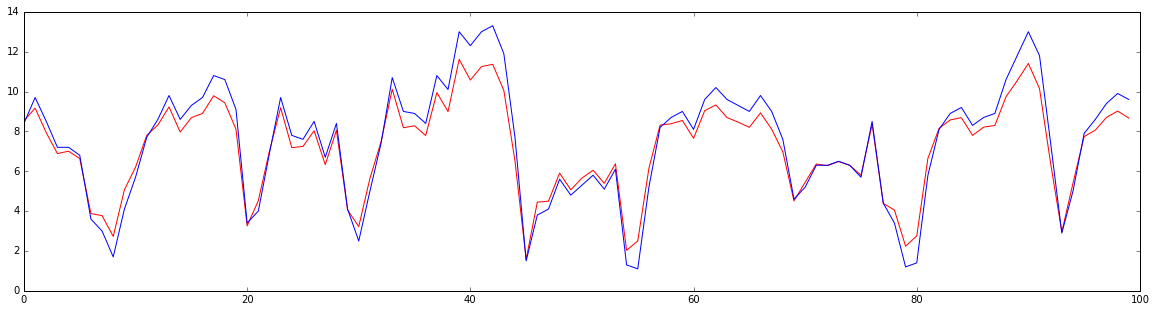

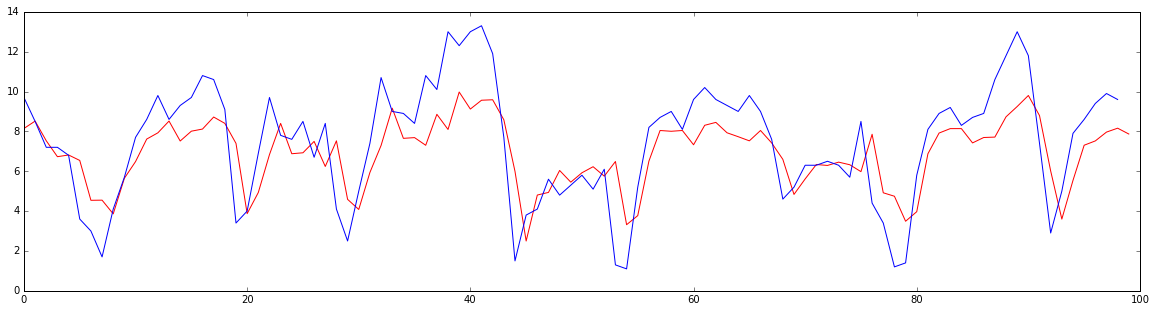

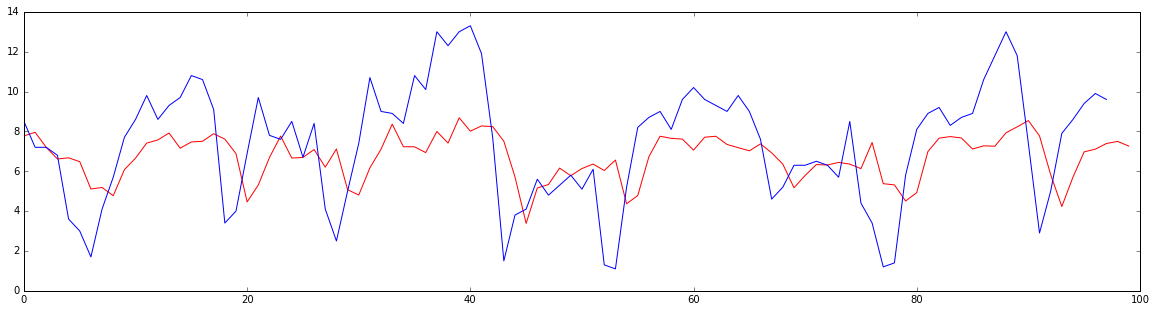

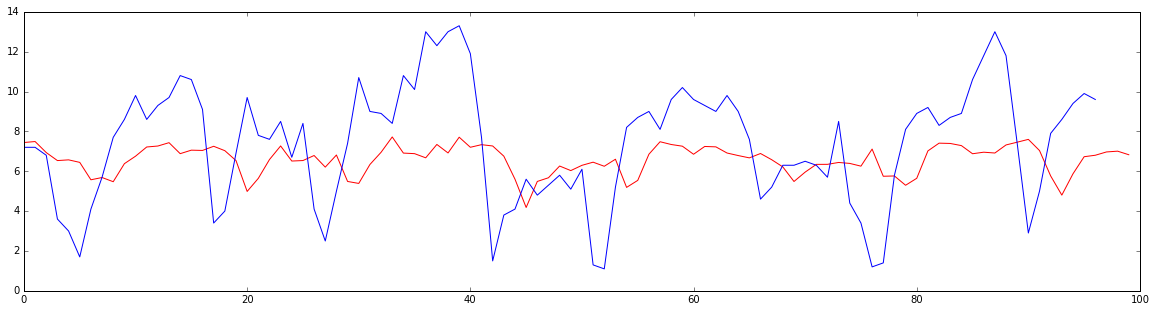

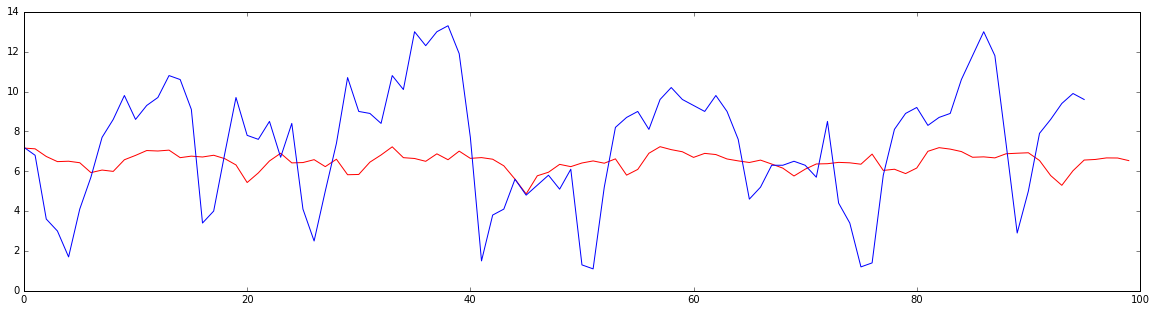

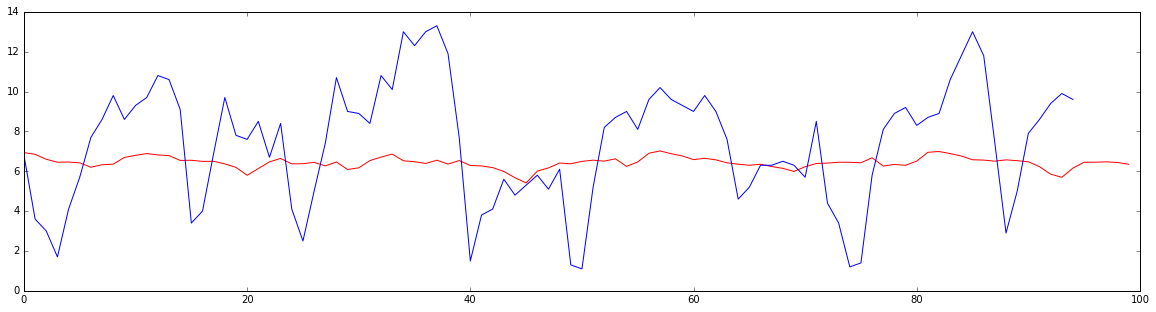

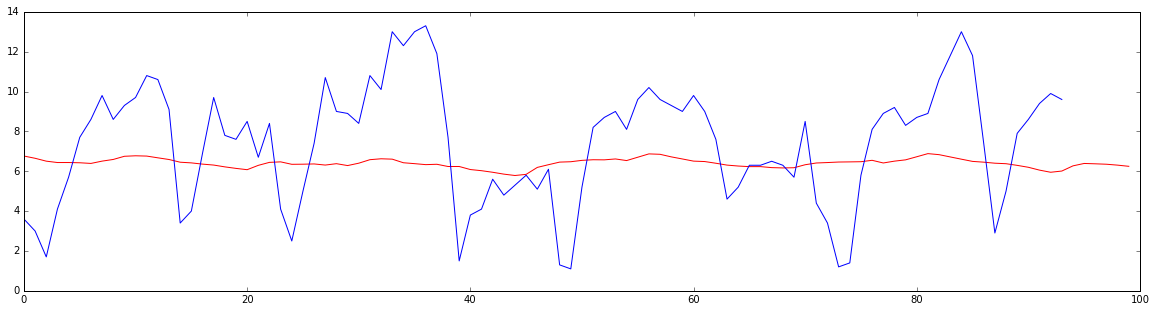

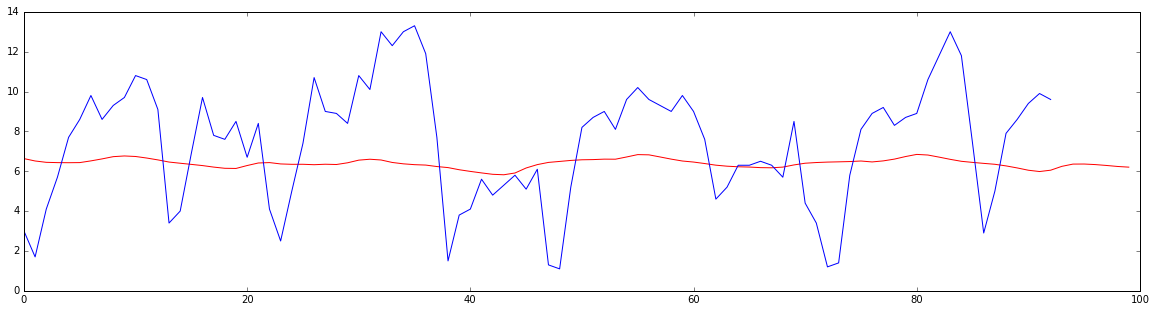

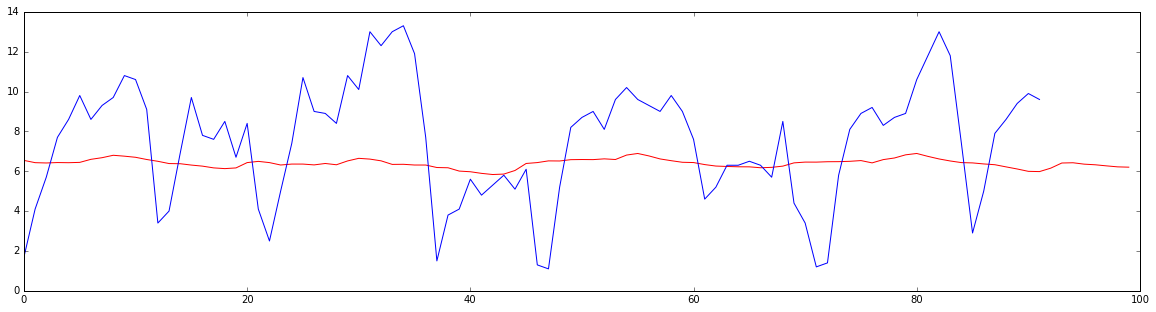

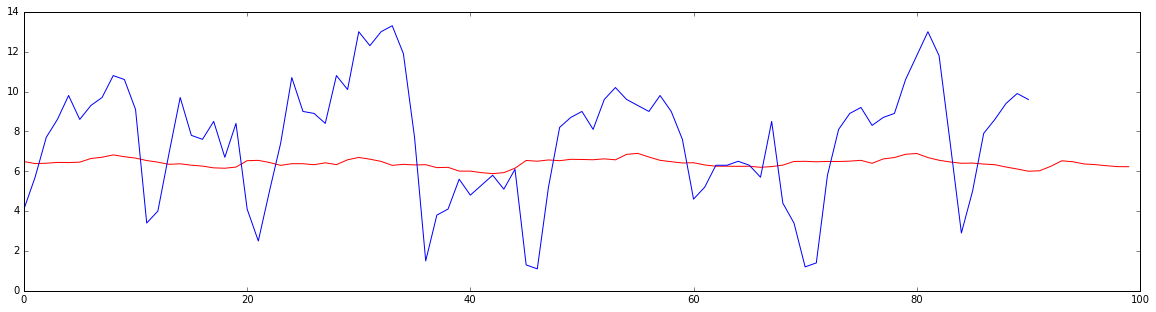

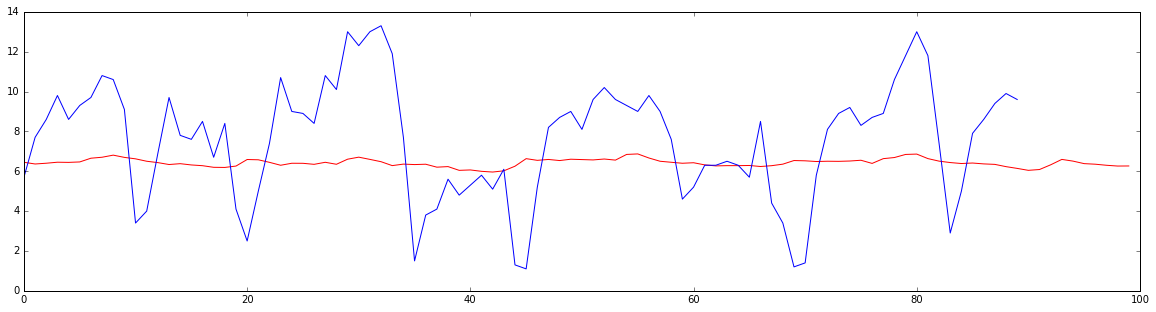

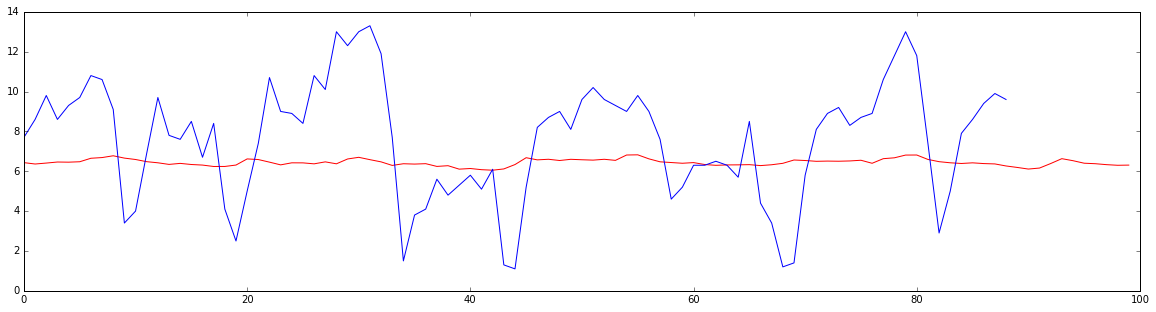

In [21]:
for i in range(12):
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)
    ax.plot(forecast[:,i],'r')
    ax.plot(test[i:100+i])
    plt.show()
